In [1]:
from matplotlib import pyplot as plt 

In [2]:
import json

In [3]:
import re

In [4]:
import numpy as np

In [5]:
def bucket(x, size):
    l = len(x)
    buckets = []
    i = 0
    while i < l:
        buckets.append(sum(x[i:i+size])/len(x[i:i+size]))
        i+=size
    return buckets

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [7]:
class LogReader():
    def __init__(self, filename, keys):
        self.file = open(f'{filename}')
        self.keys = set(keys)
        self.matches = {}
        for key in keys:
            self.matches[key]=[]
    
    def grab(self):
        line = next(self.file, None)
        while line:
            split = line.strip().split('=')
            if len(split)==2:
                query = split[0]
                value = float(split[1])
                if query in self.keys:
                    self.matches[query].append(value)
            line = next(self.file, None)
        return self.matches

In [8]:
tasks = [
    ('atac_region', 'gene'),
    ('gene', 'atac_region'),
    ('gene', 'protein_name'),
    ('protein_name', 'gene'),
]

In [9]:
base_keys = [
    'train zero one loss',
    'train value loss',
    'train prediction loss',
    'validation zero one loss',
    'validation value loss',
    'validation prediction loss',
]

keys = []
for key in base_keys:
    for task in tasks:
        keys.append(f'{key} {task}')

In [10]:
keys += [
    'Batch',
    'Epoch',
]

#### Bucket Size

In [11]:
bucket_size = 10

In [12]:
readers = {}
matches = {}

#### Timestamp of run

In [53]:
timestamps = [
    '20211031-1628',
    '20211031-1642',
]
files = [f'logs/train_earl_{tmstp}.log' for tmstp in timestamps]

In [54]:
for file in files:
    if file not in readers:
        readers[file] = LogReader(file, keys)
        matches = readers[file].grab()

## Select File

In [89]:
idx = 0

## Get matching log lines

In [90]:
file = files[idx]
matches = readers[file].grab()

## Parameters of this run

In [91]:
import json
from pprint import pprint

In [92]:
pprint(json.load(open(f'logs/earl_params_{timestamps[idx]}.json')))

{'atac_ones_weight': 10,
 'checkpoint': 25,
 'device': 'cuda:1',
 'gene_ones_weight': 10,
 'layers': [['SAGEConv', {'out_channels': 128}],
            ['SAGEConv', {'out_channels': 128}],
            ['SAGEConv', {'out_channels': 128}],
            ['SAGEConv', {'out_channels': 128}],
            ['SAGEConv', {'out_channels': 128}]],
 'lr': 0.001,
 'n_steps': 5000,
 'out_mlp': {'bias': True,
             'dim_in': 128,
             'dim_inner': 512,
             'dim_out': 1,
             'num_layers': 3},
 'train_batch_size': 100,
 'validation_batch_size': 100}


## Current Batch

In [93]:
batch = matches['Batch'][-1]
batch

192.0

## Training loss

('atac_region', 'gene') 0.9640
('gene', 'atac_region') 0.6771
('gene', 'protein_name') 0.5590
('protein_name', 'gene') 0.8749


<Figure size 1080x720 with 0 Axes>

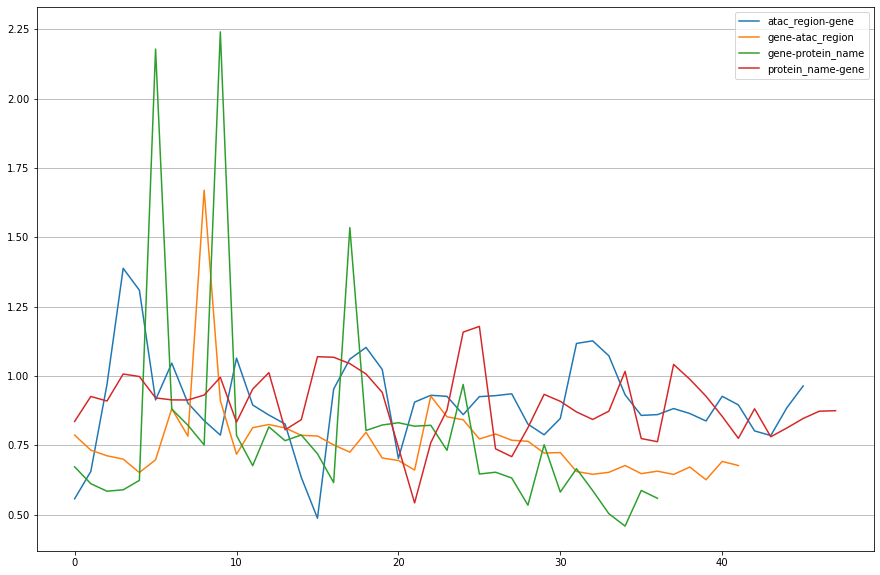

In [100]:
plt.figure(figsize=(15,10))
fig,ax = plt.subplots(figsize=(15,10))
plt.grid(axis='y')

for task in tasks:
    training_loss = matches[f'train prediction loss {task}']
    ax.plot(training_loss[5:], label=f'{task[0]}-{task[1]}')
    print(task, f'{training_loss[-1]:.4f}')
_=ax.legend()


('atac_region', 'gene') 0.9640415215492243
('gene', 'atac_region') 0.6771496534347533
('gene', 'protein_name') 0.5590493309497832
('protein_name', 'gene') 0.8748641890287396


<Figure size 1080x720 with 0 Axes>

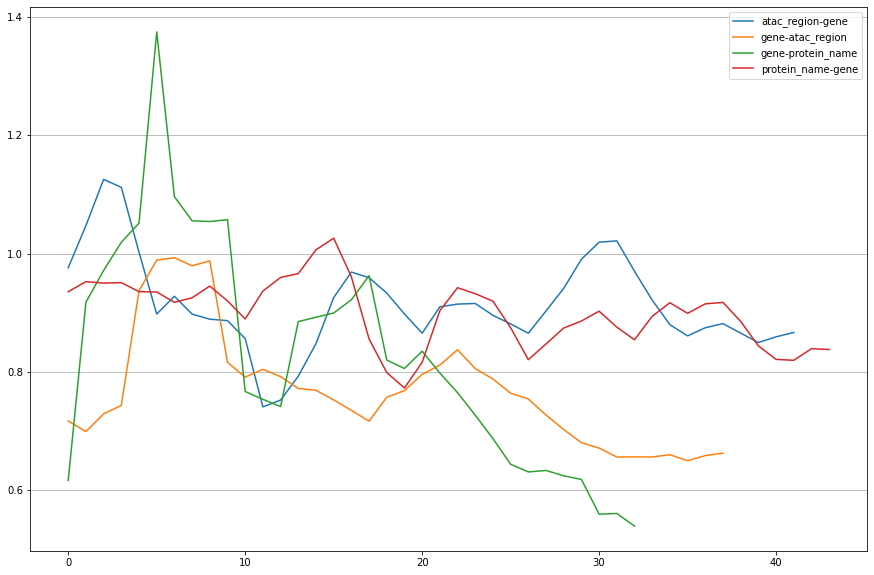

In [101]:
plt.figure(figsize=(15,10))
fig,ax = plt.subplots(figsize=(15,10))
plt.grid(axis='y')

for task in tasks:
    training_loss = matches[f'train prediction loss {task}']
    ax.plot(moving_average(training_loss[5:],5), label=f'{task[0]}-{task[1]}')
    print(task, training_loss[-1])
_=ax.legend()


## Validation Loss

('atac_region', 'gene') 95.83398467302322
('gene', 'atac_region') 66.23878479003906
('gene', 'protein_name') 51.16965125501156
('protein_name', 'gene') 91.0682070851326


<Figure size 1080x720 with 0 Axes>

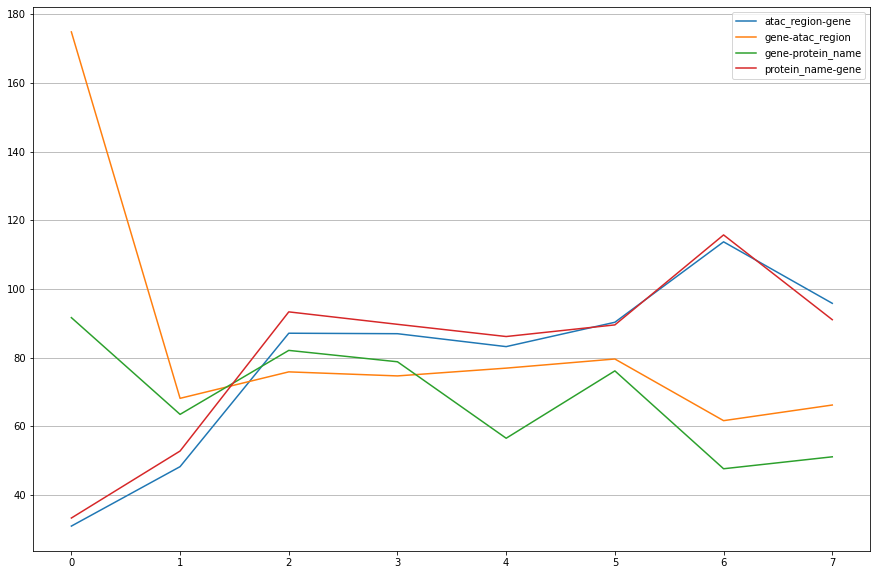

In [96]:
plt.figure(figsize=(15,10))
fig,ax = plt.subplots(figsize=(15,10))
plt.grid(axis='y')

for task in tasks:
    validation_loss = matches[f'validation prediction loss {task}']
    _=ax.plot(validation_loss, label=f'{task[0]}-{task[1]}')
    print(task, validation_loss[-1])
_=ax.legend()

## Sample predictions

In [97]:
prediction_file = open(f'logs/train_earl_prediction_sample_{timestamps[idx]}.log')

In [98]:
for line in prediction_file:
    print(line.strip())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        